NBA ERA Explained (All Detail coming from a Reddit Post)
- 1956-1967: Russell Era
- 1968-1979: ABA Expansion
- 1980-1992: Magic and Bird Era
- 1993-2003: Jordan to 2003s
- 2004-2013: Modern Era
- 2014-Present: 3-Point Curry Era

Data Collecting

In [5]:
!pip install "numpy<2"

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [7]:
pd.set_option('display.max_columns', None)
df_awards = pd.read_csv('Dataset/Player Award Shares.csv')
df_awards = df_awards.drop(columns=['seas_id', 'player_id'])
df_awards

,season,award,player,age,tm,first,pts_won,pts_max,share,winner
0,2024,clutch_poy,Stephen Curry,35,GSW,45.0,298.0,495.0,0.602,True
1,2024,clutch_poy,DeMar DeRozan,34,CHI,34.0,272.0,495.0,0.549,False
2,2024,clutch_poy,Shai Gilgeous-Alexander,25,OKC,11.0,160.0,495.0,0.323,False
3,2024,clutch_poy,Nikola Jokić,28,DEN,4.0,85.0,495.0,0.172,False
4,2024,clutch_poy,Jalen Brunson,27,NYK,2.0,26.0,495.0,0.053,False
...,...,...,...,...,...,...,...,...,...,...
3371,1956,nba mvp,Mel Hutchins,27,FTW,9.0,9.0,80.0,0.113,False
3372,1956,nba mvp,Dolph Schayes,27,SYR,2.0,2.0,80.0,0.025,False
3373,1956,nba mvp,Bill Sharman,29,BOS,2.0,2.0,80.0,0.025,False
3374,1956,nba mvp,Tom Gola,23,PHW,1.0,1.0,80.0,0.013,False


In [8]:
df_awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   season   3376 non-null   int64  
 1   award    3376 non-null   object 
 2   player   3376 non-null   object 
 3   age      3376 non-null   int64  
 4   tm       3376 non-null   object 
 5   first    3359 non-null   float64
 6   pts_won  3375 non-null   float64
 7   pts_max  3375 non-null   float64
 8   share    3375 non-null   float64
 9   winner   3375 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 263.9+ KB


In [9]:
df_team = pd.read_csv('Dataset/Team Summaries.csv', usecols=['season', 'abbreviation', 'w', 'l'])
df_team[['w', 'l']] = df_team[['w', 'l']].astype('Int64')
df_team.rename(columns={'abbreviation':'team'}, inplace=True)
df_team

,season,team,w,l
0,2025,ATL,36,38
1,2025,BOS,56,19
2,2025,BRK,25,51
3,2025,CHI,33,42
4,2025,CHO,19,56
...,...,...,...,...
1871,1947,PRO,28,32
1872,1947,STB,38,23
1873,1947,TRH,22,38
1874,1947,WSC,49,11


In [10]:
df_player_seasons = pd.read_csv('Dataset/Player Per Game.csv')
# Player_id keep in case same name players
df_player_seasons = df_player_seasons.drop(columns=['lg', 'birth_year', 'seas_id', 'player_id'])
df_player_seasons.rename(columns={
    'tm' : 'team',
    'mp_per_game' : 'MP',
    'fg_per_game' : 'FG',
    'fga_per_game' : 'FGA',
    'fg_percent' : 'FG%',
    'x3p_per_game' : '3P',
    'x3pa_per_game' : '3PA',
    'x3p_percent' : '3P%',
    'x2p_per_game' : '2P',
    'x2pa_per_game' : '2PA',
    'x2p_percent' : '2P%',
    'e_fg_percent' : 'eFG%',
    'ft_per_game' : 'FT',
    'fta_per_game' : 'FTA',
    'ft_percent' : 'FT%',
    'orb_per_game' : 'ORB',
    'drb_per_game' : 'DRB',
    'trb_per_game' : 'TRB',
    'ast_per_game' : 'AST',
    'stl_per_game' : 'STL',
    'blk_per_game' : 'BLK',
    'tov_per_game' : 'TOV',
    'pf_per_game' : 'PF',
    'pts_per_game' : 'PTS'
}, inplace=True)
df_player_seasons[['FG%', '3P%', '2P%', 'eFG%', 'FT%']] = df_player_seasons[['FG%', '3P%', '2P%', 'eFG%', 'FT%']] * 100
df_player_seasons

,season,player,pos,age,experience,team,g,gs,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2025,A.J. Green,SG,25.0,3.0,MIL,66,6.0,22.7,2.5,5.9,42.3,2.1,5.0,41.4,0.4,0.8,47.3,60.1,0.3,0.4,83.3,0.2,2.0,2.3,1.5,0.5,0.1,0.6,2.2,7.4
1,2025,A.J. Lawson,SG,24.0,3.0,TOR,19,2.0,17.3,2.7,7.1,38.1,1.3,4.0,31.6,1.4,3.1,46.6,47.0,1.2,1.8,64.7,0.7,2.3,3.0,0.8,0.3,0.2,0.4,1.5,7.8
2,2025,AJ Johnson,SG,20.0,1.0,TOT,22,5.0,18.0,2.4,5.8,40.6,0.7,2.5,29.1,1.6,3.3,49.3,46.9,1.0,1.1,84.0,0.3,1.7,2.0,2.4,0.4,0.1,1.0,0.9,6.4
3,2025,AJ Johnson,SG,20.0,1.0,MIL,7,0.0,6.3,1.1,2.7,42.1,0.4,0.7,60.0,0.7,2.0,35.7,50.0,0.1,0.3,50.0,0.0,1.0,1.0,1.0,0.1,0.0,0.6,0.0,2.9
4,2025,AJ Johnson,SG,20.0,1.0,WAS,15,5.0,23.5,2.9,7.3,40.4,0.9,3.3,26.0,2.1,3.9,52.5,46.3,1.3,1.5,87.0,0.5,2.0,2.5,3.0,0.5,0.1,1.3,1.3,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32584,1947,Walt Miller,F,31.0,1.0,PIT,12,NaN,NaN,0.6,1.8,33.3,NaN,NaN,NaN,0.6,1.8,33.3,33.3,0.8,1.5,50.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.3,1.9
32585,1947,Warren Fenley,F,24.0,1.0,BOS,33,NaN,NaN,0.9,4.2,22.5,NaN,NaN,NaN,0.9,4.2,22.5,22.5,0.7,1.4,51.1,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.8,2.6
32586,1947,Wilbert Kautz,G-F,31.0,1.0,CHS,50,NaN,NaN,2.1,8.4,25.5,NaN,NaN,NaN,2.1,8.4,25.5,25.5,0.8,1.5,53.4,NaN,NaN,NaN,0.7,NaN,NaN,NaN,2.3,5.1
32587,1947,Woody Grimshaw,G,27.0,1.0,PRO,21,NaN,NaN,1.0,2.7,35.7,NaN,NaN,NaN,1.0,2.7,35.7,35.7,1.0,2.1,47.7,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.2,2.9


In [11]:
df_advanced = pd.read_csv('Dataset\Advanced.csv')

Data Cleaning

In [12]:
df_awards[(df_awards['winner'].isnull()) == True]

,season,award,player,age,tm,first,pts_won,pts_max,share,winner
2818,1983,smoy,Bobby Jones,31,PHI,NaN,NaN,NaN,NaN,NaN


In [13]:
df_awards.loc[(df_awards['player'] == 'Bobby Jones') & (df_awards['season'] == 1983) & (df_awards['award'] == 'smoy'), 'winner'] = True

In [14]:
df_awards[(df_awards['winner'].isnull()) == True]

,season,award,player,age,tm,first,pts_won,pts_max,share,winner


In [15]:
df_awards.describe()

,season,age,first,pts_won,pts_max,share
count,3376.000000,3376.000000,3359.00000,3375.000000,3375.000000,3375.000000
mean,2000.044431,26.150770,8.18696,72.827822,560.761481,0.128121
std,16.565107,3.836212,20.33892,168.607120,343.718835,0.227177
min,1956.000000,19.000000,0.00000,0.100000,17.000000,0.001000
25%,1989.000000,23.000000,0.00000,2.000000,176.000000,0.006000
50%,2004.000000,26.000000,1.00000,7.000000,600.000000,0.020000
75%,2013.000000,29.000000,4.00000,45.000000,690.000000,0.128000
max,2024.000000,40.000000,159.00000,1310.000000,1310.000000,1.000000


In [16]:
df_mvp = df_awards[df_awards['award'] == 'nba mvp'].copy()
# pd.unique(df_mvp['award'])


Analysis of MVP Winners

In [17]:
df_mvp_winner = df_mvp.groupby('season').head(1)
df_merged_mvp = pd.merge(df_mvp_winner, df_player_seasons, on=['season', 'player'], suffixes=(' ', '_y'))
df_merged_mvp.drop(df_merged_mvp.filter(regex='_y$').columns, axis=1, inplace=True)
df_merged_mvp.columns = df_merged_mvp.columns.str.strip() # Need to clean this up because although age looked like 'age', there are hidden spaces
df_merged_mvp = pd.merge(df_merged_mvp, df_team, on=['season','team'])
df_merged_mvp['Win_%'] = df_merged_mvp['w']/(df_merged_mvp['w'] + df_merged_mvp['l']) * 100
df_merged_mvp['Win_%'] = df_merged_mvp['Win_%'].round(2)
df_merged_mvp
# Create Eras to group players
era_bins = [1956, 1968, 1980, 1993, 2004, 2014, 2025]
era_labels = ['1956-1967', '1968-1979', '1980-1992', '1993-2003', '2004-2013', '2014-Present']
df_merged_mvp['Era'] = pd.cut(df_merged_mvp['season'], bins=era_bins, labels=era_labels, right=False)
df_merged_mvp['experience'] = df_merged_mvp['experience'].astype('Int64')
df_merged_mvp['gs'] = df_merged_mvp['gs'].astype('Int64')
df_merged_mvp

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,pos,experience,team,g,gs,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,w,l,Win_%,Era
0,2024,nba mvp,Nikola Jokić,28,DEN,79.0,926.0,990.0,0.935,True,C,9,DEN,79,79,34.6,10.4,17.9,58.3,1.1,2.9,35.9,9.4,14.9,62.6,61.2,4.5,5.5,81.7,2.8,9.5,12.4,9.0,1.4,0.9,3.0,2.5,26.4,57,25,69.51,2014-Present
1,2023,nba mvp,Joel Embiid,28,PHI,73.0,915.0,1000.0,0.915,True,C,7,PHI,66,66,34.6,11.0,20.1,54.8,1.0,3.0,33.0,10.0,17.1,58.7,57.3,10.0,11.7,85.7,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,54,28,65.85,2014-Present
2,2022,nba mvp,Nikola Jokić,26,DEN,65.0,875.0,1000.0,0.875,True,C,7,DEN,74,74,33.5,10.3,17.7,58.3,1.3,3.9,33.7,9.0,13.8,65.2,62.0,5.1,6.3,81.0,2.8,11.0,13.8,7.9,1.5,0.9,3.8,2.6,27.1,48,34,58.54,2014-Present
3,2021,nba mvp,Nikola Jokić,25,DEN,91.0,971.0,1010.0,0.961,True,C,6,DEN,72,72,34.6,10.2,18.0,56.6,1.3,3.3,38.8,8.9,14.7,60.6,60.2,4.8,5.5,86.8,2.8,8.0,10.8,8.3,1.3,0.7,3.1,2.7,26.4,47,25,65.28,2014-Present
4,2020,nba mvp,Giannis Antetokounmpo,25,MIL,85.0,962.0,1010.0,0.952,True,PF,7,MIL,63,63,30.4,10.9,19.7,55.3,1.4,4.7,30.4,9.5,15.0,63.1,58.9,6.3,10.0,63.3,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,56,17,76.71,2014-Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1960,nba mvp,Wilt Chamberlain,23,PHW,49.0,270.0,395.0,0.684,True,C,1,PHW,72,<NA>,46.4,14.8,32.1,46.1,NaN,NaN,NaN,14.8,32.1,46.1,46.1,8.0,13.8,58.2,NaN,NaN,27.0,2.3,NaN,NaN,NaN,2.1,37.6,49,26,65.33,1956-1967
65,1959,nba mvp,Bob Pettit,26,STL,59.0,317.0,410.0,0.773,True,PF,5,STL,72,<NA>,39.9,10.0,22.8,43.8,NaN,NaN,NaN,10.0,22.8,43.8,43.8,9.3,12.2,75.9,NaN,NaN,16.4,3.1,NaN,NaN,NaN,2.8,29.2,49,23,68.06,1956-1967
66,1958,nba mvp,Bill Russell,23,BOS,33.0,228.0,400.0,0.570,True,C,2,BOS,69,<NA>,38.3,6.6,15.0,44.2,NaN,NaN,NaN,6.6,15.0,44.2,44.2,3.3,6.4,51.9,NaN,NaN,22.7,2.9,NaN,NaN,NaN,2.6,16.6,49,23,68.06,1956-1967
67,1957,nba mvp,Bob Cousy,28,BOS,23.0,23.0,80.0,0.288,True,PG,7,BOS,64,<NA>,36.9,7.5,19.8,37.8,NaN,NaN,NaN,7.5,19.8,37.8,37.8,5.7,6.9,82.1,NaN,NaN,4.8,7.5,NaN,NaN,NaN,2.1,20.6,44,28,61.11,1956-1967


In [18]:
df_merged_mvp.describe()

,season,age,first,pts_won,pts_max,share,experience,g,gs,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,w,l,Win_%
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0,69.000000,44.0,69.000000,69.000000,69.000000,69.000000,45.000000,45.000000,45.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,51.000000,51.000000,69.000000,69.000000,51.000000,51.000000,47.000000,69.000000,69.000000,69.0,69.0,69.0
mean,1990.000000,27.159420,75.644928,717.326087,855.840580,0.786493,7.043478,77.318841,77.090909,38.814493,9.772464,19.227536,50.942029,1.035556,2.800000,28.826667,9.105797,17.394203,52.634783,52.733333,5.972464,7.969565,75.836232,2.290196,7.421569,12.185507,5.663768,1.509804,1.350980,3.280851,2.543478,26.191304,57.956522,22.188406,72.223478
std,20.062403,2.867789,29.565618,366.048131,350.959719,0.180501,2.851392,6.472777,6.583341,3.748383,2.000212,3.675471,5.286843,1.104157,2.683451,13.851672,2.312236,4.414511,5.863040,5.673537,1.852493,2.395726,12.100461,1.434609,2.638736,6.045374,2.705711,0.540465,1.066091,0.560915,0.560850,5.149064,8.110333,6.587143,8.34793
min,1956.000000,22.000000,23.000000,23.000000,80.000000,0.288000,1.0,49.000000,49.0,30.400000,5.200000,10.900000,37.800000,0.000000,0.000000,0.000000,4.500000,8.500000,37.800000,37.800000,2.500000,3.200000,38.000000,0.600000,2.600000,3.300000,1.300000,0.500000,0.100000,2.100000,1.400000,13.800000,33.0,9.0,45.83
25%,1973.000000,25.000000,56.000000,444.000000,690.000000,0.665000,5.0,76.000000,76.0,36.600000,8.700000,16.800000,48.000000,0.100000,0.500000,24.700000,7.700000,15.000000,49.400000,49.700000,4.600000,6.000000,71.000000,1.350000,5.000000,7.400000,3.800000,1.050000,0.600000,3.000000,2.100000,23.900000,54.0,18.0,68.75
50%,1990.000000,27.000000,73.000000,765.000000,960.000000,0.852000,7.0,80.000000,79.0,38.300000,10.000000,19.500000,50.900000,0.900000,2.400000,33.000000,9.000000,16.800000,52.900000,52.900000,5.900000,7.900000,77.900000,2.100000,7.500000,10.800000,5.000000,1.500000,0.900000,3.300000,2.600000,26.400000,60.0,22.0,73.17
75%,2007.000000,29.000000,91.000000,971.000000,1180.000000,0.935000,9.0,82.000000,81.0,41.000000,10.800000,21.200000,53.900000,1.400000,4.300000,38.800000,10.400000,20.900000,55.600000,56.000000,7.300000,10.000000,84.800000,2.950000,9.450000,15.300000,7.300000,1.800000,1.900000,3.550000,2.800000,29.700000,63.0,25.0,76.83
max,2024.000000,35.000000,159.000000,1310.000000,1310.000000,1.000000,14.0,82.000000,82.0,47.300000,14.800000,32.100000,68.300000,5.100000,11.200000,45.400000,14.800000,32.100000,68.300000,68.300000,10.100000,13.800000,92.100000,7.200000,13.500000,27.000000,12.800000,3.200000,4.100000,5.400000,3.800000,37.600000,73.0,42.0,89.02


Win Percentage for Winners: Win percentage is a better quantifier because there are differnet number of games throughout seasons

In [19]:
df_merged_mvp.groupby('Win_%')['Win_%'].count()
win_perc_bin = [40, 50, 60, 70, 80, 90]
win_per_label = ['40-49%','50-59%', '60-69%', '70-79%', '80-89%']
df_merged_mvp['Win_Bin'] = pd.cut(df_merged_mvp['Win_%'], bins=win_perc_bin, labels=win_per_label, right=False)
df_win_count = df_merged_mvp.groupby('Win_Bin', observed=False)['Win_Bin'].count()

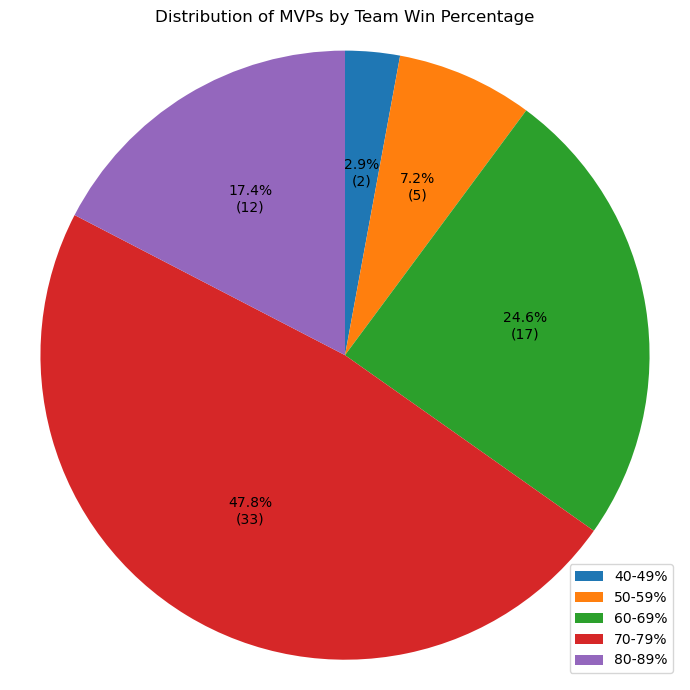

In [20]:
plt.figure(figsize=(7, 7))
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return my_autopct
plt.pie(
    df_win_count.values, 
    labels=df_win_count.index, 
    autopct=make_autopct(df_win_count.values), 
    startangle=90,
    counterclock=False,
    labeldistance=None
)
plt.title('Distribution of MVPs by Team Win Percentage')
plt.legend(loc=4).set_visible(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

The minimum seems to be at least 60-69 but the majority wins 70-79 percent of their team games.
This seems to be a very important part of mvp discussion

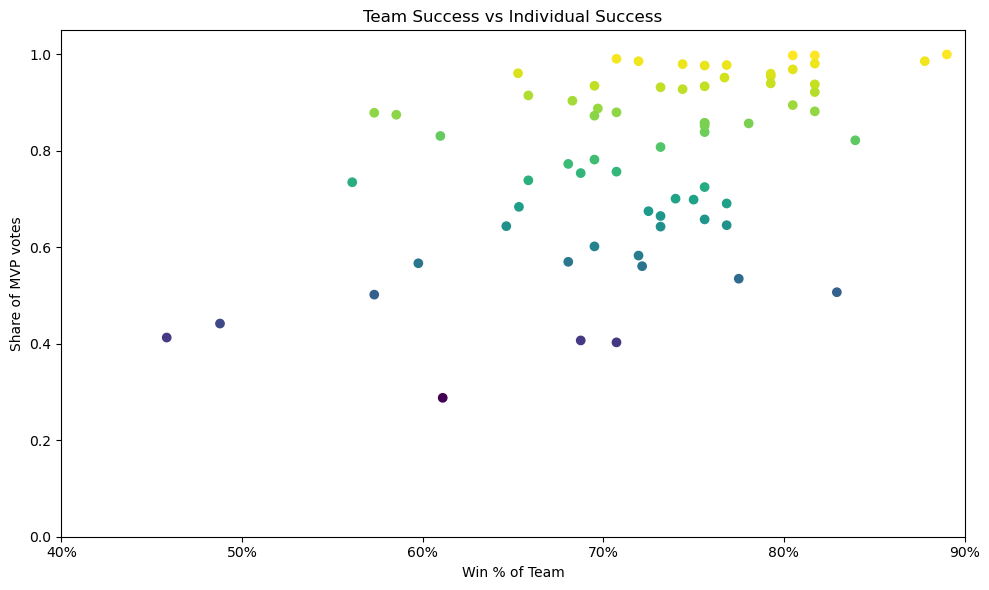

In [21]:
win_vs_share = df_merged_mvp[['Win_%', 'share']]
plt.figure(figsize=(10, 6))
plt.scatter(
    win_vs_share['Win_%'],
    win_vs_share['share'], 
    c=win_vs_share['share'],
    cmap='viridis'
)
plt.title('Team Success vs Individual Success')
plt.ylabel('Share of MVP votes')
plt.xlabel('Win % of Team')
plt.xlim(40, 90)
plt.ylim(0, 1.05)
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()

MVP Experience Analysis
Uses Experience instead of age because there is a chance of mvp potentially joining the nba late, believe that this will be a better way of measurement

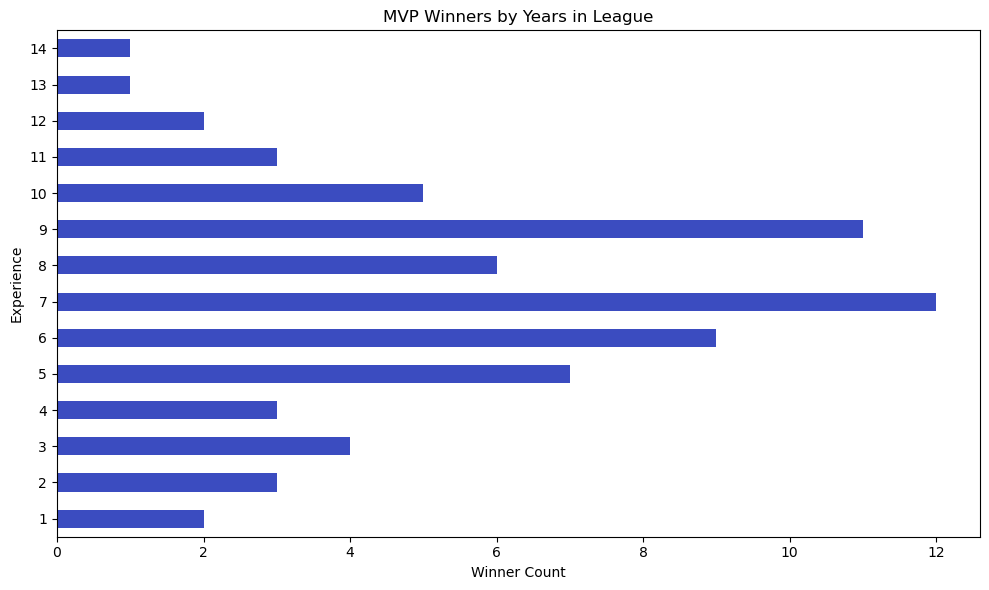

In [22]:
df_mvp_age = df_merged_mvp.copy().groupby('experience')
plt.figure(figsize=(10,6))
df_mvp_age['experience'].count().plot(kind='barh', colormap='coolwarm')
plt.title('MVP Winners by Years in League')
plt.ylabel('Experience')
plt.xlabel('Winner Count')
plt.tight_layout()
plt.show()


Seems like prime begins from 5-10 years in the league, this can be used for prediction model
This graph shows raw MVP counts by years of experience. While normalizing by total league population at each experience level could give a per-player rate, doing so may exaggerate outliers where very few players are eligible. For this reason, raw counts were chosen to preserve interpretability.

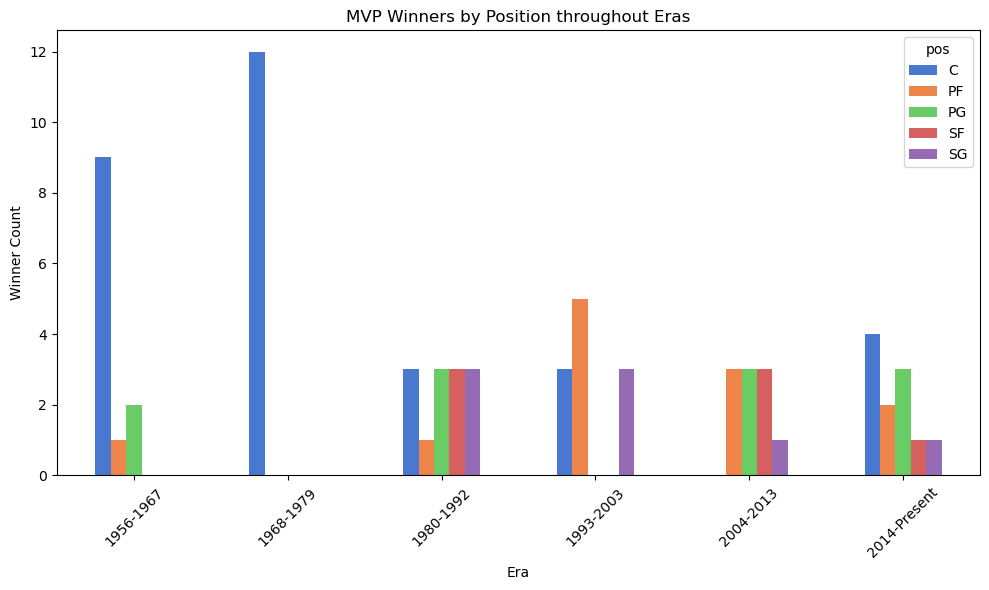

In [23]:
# Position Winner Changes throughout the years, Im thinking a column chart with line chart
sns.set_palette('muted')
df_winner_positions = pd.pivot_table(df_merged_mvp, index='Era', columns='pos', values='player' ,aggfunc='count', observed=False) # Index x, Columns filter, values is why
fig, ax = plt.subplots(figsize=(10, 6))
df_winner_positions.plot(kind='bar', ax=ax)
plt.title('MVP Winners by Position throughout Eras')
ax.tick_params("x", rotation=45)
plt.xlabel('Era')
plt.ylabel("Winner Count")
plt.tight_layout()
plt.show()

Can be seen that it was heavily dominated by big men early, especially in 2nd era with all being center

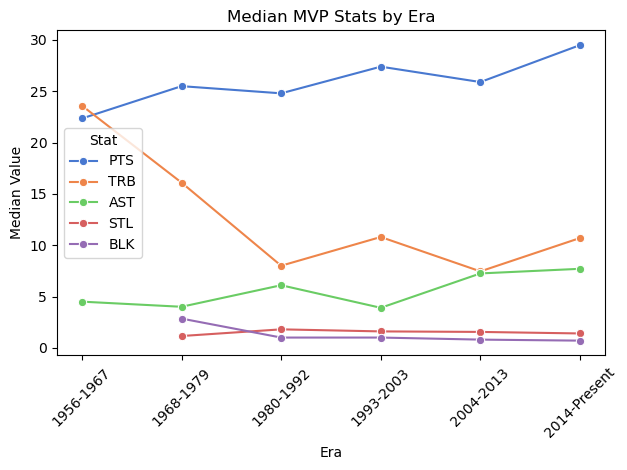

In [24]:
mvp_top_stats = df_merged_mvp.groupby('Era',observed=False)[['PTS', 'TRB', 'AST', 'STL', 'BLK']].median()
mvp_top_stats_long = mvp_top_stats.reset_index().melt(id_vars='Era', var_name='Stat', value_name='Median') # Needed because since we are plotting multiple stats, it is needed
sns.lineplot(data=mvp_top_stats_long, x='Era', y='Median', hue='Stat', marker='o')
plt.title('Median MVP Stats by Era')
plt.xlabel('Era')
plt.ylabel('Median Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
mvp_top_stats

,PTS,TRB,AST,STL,BLK
Era,,,,,
1956-1967,22.35,23.60,4.50,NaN,NaN
1968-1979,25.50,16.10,4.00,1.15,2.85
1980-1992,24.80,8.00,6.10,1.80,1.00
1993-2003,27.40,10.80,3.90,1.60,1.00
2004-2013,25.90,7.45,7.25,1.55,0.80
2014-Present,29.50,10.70,7.70,1.40,0.70


In [96]:
position_map = {
    'C': 'Center',
    'PF': 'Forward',
    'SF': 'Forward',
    'SG': 'Guard',
    'PG': 'Guard',
}
df_merged_mvp['Position_Group'] = df_merged_mvp['pos'].map(position_map) # .map uses the dictionary postion_map and give it the value
mvp_profile = df_merged_mvp.groupby(['Era', 'Position_Group'], observed=False)[['PTS', 'TRB', 'AST', 'STL', 'BLK']].agg(['median'])
mvp_profile

PTS    TRB    AST    STL    BLK
                            median median median median median
Era          Position_Group                                   
1956-1967    Center          18.90  23.90   4.50    NaN    NaN
             Forward         29.20  16.40   3.10    NaN    NaN
             Guard           26.00   7.35   9.25    NaN    NaN
1968-1979    Center          25.50  16.10   4.00   1.15   2.85
             Forward           NaN    NaN    NaN    NaN    NaN
             Guard             NaN    NaN    NaN    NaN    NaN
1980-1992    Center          24.80  14.70   1.80   1.00   2.00
             Forward         25.20   9.95   6.60   1.90   1.05
             Guard           27.00   6.35   8.80   2.05   0.70
1993-2003    Center          27.60  11.90   3.60   1.60   3.20
             Forward         25.50  12.20   4.10   1.30   1.00
             Guard           30.40   5.80   4.30   2.20   0.50
2004-2013    Center            NaN    NaN    NaN    NaN    NaN
             Forward         26.95   7.95   6.70   1.65   0.95
             Guard           21.90   4.15   9.10   1.00   0.35
2014-Present Center          26.75  11.60   8.10   1.35   0.90
             Forward         29.50  12.50   5.60   1.30   1.00
             Guard           30.25   5.40   8.25   1.90   0.30

In [113]:
df_mvp_top_3 = df_mvp.groupby('season').head(3)
df_merged_top_3 = pd.merge(df_mvp_top_3, df_player_seasons, on=['season', 'player'], suffixes=(' ', '_y'))
df_merged_top_3.drop(df_merged_top_3.filter(regex='_y$').columns, axis=1, inplace=True)
df_merged_top_3.columns = df_merged_top_3.columns.str.strip() # Need to clean this up because although age looked like 'age', there are hidden spaces
df_merged_top_3 = pd.merge(df_merged_top_3, df_team, on=['season','team'])
df_merged_top_3['Win_%'] = df_merged_top_3['w']/(df_merged_top_3['w'] + df_merged_top_3['l']) * 100
df_merged_top_3['Win_%'] = df_merged_top_3['Win_%'].round(2)
df_merged_top_3
# Create Eras to group players
era_bins = [1956, 1968, 1980, 1993, 2004, 2014, 2025]
era_labels = ['1956-1967', '1968-1979', '1980-1992', '1993-2003', '2004-2013', '2014-Present']
df_merged_top_3['Era'] = pd.cut(df_merged_top_3['season'], bins=era_bins, labels=era_labels, right=False)
df_merged_top_3['experience'] = df_merged_top_3['experience'].astype('Int64')
df_merged_top_3['gs'] = df_merged_top_3['gs'].astype('Int64')
df_merged_top_3['Position_Group'] = df_merged_top_3['pos'].map(position_map) # .map uses the dictionary postion_map and give it the value
df_merged_top_3

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,pos,experience,team,g,gs,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,w,l,Win_%,Era,Position_Group
0,2024,nba mvp,Nikola Jokić,28,DEN,79.0,926.0,990.0,0.935,True,C,9,DEN,79,79,34.6,10.4,17.9,58.3,1.1,2.9,35.9,9.4,14.9,62.6,61.2,4.5,5.5,81.7,2.8,9.5,12.4,9.0,1.4,0.9,3.0,2.5,26.4,57,25,69.51,2014-Present,Center
1,2024,nba mvp,Shai Gilgeous-Alexander,25,OKC,15.0,640.0,990.0,0.646,False,PG,6,OKC,75,75,34.0,10.6,19.8,53.5,1.3,3.6,35.3,9.3,16.2,57.6,56.7,7.6,8.7,87.4,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,57,25,69.51,2014-Present,Guard
2,2024,nba mvp,Luka Dončić,24,DAL,4.0,566.0,990.0,0.572,False,PG,6,DAL,70,70,37.5,11.5,23.6,48.7,4.1,10.6,38.2,7.4,13.0,57.3,57.3,6.8,8.7,78.6,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,50,32,60.98,2014-Present,Guard
3,2023,nba mvp,Joel Embiid,28,PHI,73.0,915.0,1000.0,0.915,True,C,7,PHI,66,66,34.6,11.0,20.1,54.8,1.0,3.0,33.0,10.0,17.1,58.7,57.3,10.0,11.7,85.7,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,54,28,65.85,2014-Present,Center
4,2023,nba mvp,Nikola Jokić,27,DEN,15.0,674.0,1000.0,0.674,False,C,8,DEN,69,69,33.7,9.4,14.8,63.2,0.8,2.2,38.3,8.5,12.7,67.5,66.0,4.9,6.0,82.2,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,53,29,64.63,2014-Present,Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1957,nba mvp,Bob Pettit,24,STL,21.0,21.0,80.0,0.263,False,C,3,STL,71,<NA>,35.1,8.6,20.8,41.5,NaN,NaN,NaN,8.6,20.8,41.5,41.5,7.5,9.6,77.3,NaN,NaN,14.6,1.9,NaN,NaN,NaN,2.5,24.7,34,38,47.22,1956-1967,Center
203,1957,nba mvp,Paul Arizin,28,PHW,9.0,9.0,80.0,0.113,False,SF,5,PHW,71,<NA>,39.0,8.6,20.4,42.2,NaN,NaN,NaN,8.6,20.4,42.2,42.2,8.3,10.0,82.9,NaN,NaN,7.9,2.1,NaN,NaN,NaN,3.9,25.6,37,35,51.39,1956-1967,Forward
204,1956,nba mvp,Bob Pettit,23,STL,33.0,33.0,80.0,0.413,True,C,2,STL,72,<NA>,38.8,9.0,20.9,42.9,NaN,NaN,NaN,9.0,20.9,42.9,42.9,7.7,10.5,73.6,NaN,NaN,16.2,2.6,NaN,NaN,NaN,2.8,25.7,33,39,45.83,1956-1967,Center
205,1956,nba mvp,Paul Arizin,27,PHW,21.0,21.0,80.0,0.263,False,SF,4,PHW,72,<NA>,37.8,8.6,19.1,44.8,NaN,NaN,NaN,8.6,19.1,44.8,44.8,7.0,8.7,81.0,NaN,NaN,7.5,2.6,NaN,NaN,NaN,3.9,24.2,45,27,62.5,1956-1967,Forward


In [129]:
from sklearn.preprocessing import StandardScaler
df_recent = df_merged_top_3[(df_merged_top_3['Era'] == '2014-Present')].copy()
features = ['PTS', 'TRB', 'AST', 'STL', 'BLK']
scaler = StandardScaler()
scaled_all = scaler.fit_transform(df_recent[features])
selected_profile = mvp_profile.loc[('2014-Present', 'Guard')].values
scaled_profile = scaler.transform([selected_profile])

c:\Users\simch\anaconda3\envs\python_project\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [130]:
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(scaled_all, scaled_profile)
df_recent['mvp_distance'] = distances

In [133]:
closest_mvp = df_recent.sort_values('mvp_distance').head(20)
closest_mvp

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,pos,experience,team,g,gs,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,w,l,Win_%,Era,Position_Group,mvp_distance
18,2018,nba mvp,James Harden,28,HOU,86.0,965.0,1010.0,0.955,True,SG,9,HOU,72,72,35.4,9.0,20.1,44.9,3.7,10.0,36.7,5.4,10.1,53.1,54.1,8.7,10.1,85.8,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,65,17,79.27,2014-Present,Guard,0.889018
24,2016,nba mvp,Stephen Curry,27,GSW,131.0,1310.0,1310.0,1.000,True,PG,7,GSW,79,79,34.2,10.2,20.2,50.4,5.1,11.2,45.4,5.1,9.0,56.6,63.0,4.6,5.1,90.8,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1,73,9,89.02,2014-Present,Guard,0.890532
28,2015,nba mvp,James Harden,25,HOU,25.0,936.0,1300.0,0.720,False,SG,6,HOU,81,81,36.8,8.0,18.1,44.0,2.6,6.9,37.5,5.4,11.3,48.0,51.1,8.8,10.2,86.8,0.9,4.7,5.7,7.0,1.9,0.7,4.0,2.6,27.4,56,26,68.29,2014-Present,Guard,1.297243
1,2024,nba mvp,Shai Gilgeous-Alexander,25,OKC,15.0,640.0,990.0,0.646,False,PG,6,OKC,75,75,34.0,10.6,19.8,53.5,1.3,3.6,35.3,9.3,16.2,57.6,56.7,7.6,8.7,87.4,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,57,25,69.51,2014-Present,Guard,1.521330
31,2014,nba mvp,LeBron James,29,MIA,6.0,891.0,1250.0,0.713,False,PF,11,MIA,77,77,37.7,10.0,17.6,56.7,1.5,4.0,37.9,8.5,13.6,62.2,61.0,5.7,7.6,75.0,1.1,5.9,6.9,6.3,1.6,0.3,3.5,1.6,27.1,54,28,65.85,2014-Present,Forward,1.612715
14,2020,nba mvp,James Harden,30,HOU,0.0,367.0,1010.0,0.363,False,SG,11,HOU,68,68,36.5,9.9,22.3,44.4,4.4,12.4,35.5,5.5,9.9,55.6,54.3,10.2,11.8,86.5,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,44,28,61.11,2014-Present,Guard,1.825193
29,2015,nba mvp,LeBron James,30,CLE,5.0,552.0,1300.0,0.425,False,SF,12,CLE,69,69,36.1,9.0,18.5,48.8,1.7,4.9,35.4,7.3,13.6,53.6,53.5,5.4,7.7,71.0,0.7,5.3,6.0,7.4,1.6,0.7,3.9,2.0,25.3,53,29,64.63,2014-Present,Forward,1.938779
27,2015,nba mvp,Stephen Curry,26,GSW,100.0,1198.0,1300.0,0.922,True,PG,6,GSW,80,80,32.7,8.2,16.8,48.7,3.6,8.1,44.3,4.6,8.7,52.8,59.4,3.9,4.2,91.4,0.7,3.6,4.3,7.7,2.0,0.2,3.1,2.0,23.8,67,15,81.71,2014-Present,Guard,2.024197
22,2017,nba mvp,James Harden,27,HOU,22.0,753.0,1010.0,0.746,False,PG,8,HOU,81,81,36.4,8.3,18.9,44.0,3.2,9.3,34.7,5.1,9.6,53.0,52.5,9.2,10.9,84.7,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,55,27,67.07,2014-Present,Guard,2.027868
16,2019,nba mvp,James Harden,29,HOU,23.0,776.0,1010.0,0.768,False,PG,10,HOU,78,78,36.8,10.8,24.5,44.2,4.8,13.2,36.8,6.0,11.3,52.8,54.1,9.7,11.0,87.9,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,53,29,64.63,2014-Present,Guard,2.030452


In [ ]:
df_recent = df_merged_top_3[(df_merged_top_3['Era'] == '2014-Present')].copy()
features = ['PTS', 'TRB', 'AST', 'STL', 'BLK']
scaler = StandardScaler()
df_guards = df_recent[df_recent['Position_Group'] == 'Guard'].copy()
scaled_all = scaler.fit_transform(df_guards[features])
selected_profile_guard = mvp_profile.loc[('2014-Present', 'Guard')].values
scaled_profile = scaler.transform([selected_profile_guard])


c:\Users\simch\anaconda3\envs\python_project\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

distances = euclidean_distances(scaled_all, scaled_profile)
df_guards['mvp_distance'] = distances

In [118]:
closest_mvp_guard = df_guards.sort_values('mvp_distance').head(10)
closest_mvp_guard

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,pos,experience,team,g,gs,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,w,l,Win_%,Era,Position_Group,mvp_distance
24,2016,nba mvp,Stephen Curry,27,GSW,131.0,1310.0,1310.0,1.000,True,PG,7,GSW,79,79,34.2,10.2,20.2,50.4,5.1,11.2,45.4,5.1,9.0,56.6,63.0,4.6,5.1,90.8,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1,73,9,89.02,2014-Present,Guard,1.180725
18,2018,nba mvp,James Harden,28,HOU,86.0,965.0,1010.0,0.955,True,SG,9,HOU,72,72,35.4,9.0,20.1,44.9,3.7,10.0,36.7,5.4,10.1,53.1,54.1,8.7,10.1,85.8,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,65,17,79.27,2014-Present,Guard,1.632263
28,2015,nba mvp,James Harden,25,HOU,25.0,936.0,1300.0,0.720,False,SG,6,HOU,81,81,36.8,8.0,18.1,44.0,2.6,6.9,37.5,5.4,11.3,48.0,51.1,8.8,10.2,86.8,0.9,4.7,5.7,7.0,1.9,0.7,4.0,2.6,27.4,56,26,68.29,2014-Present,Guard,1.919965
27,2015,nba mvp,Stephen Curry,26,GSW,100.0,1198.0,1300.0,0.922,True,PG,6,GSW,80,80,32.7,8.2,16.8,48.7,3.6,8.1,44.3,4.6,8.7,52.8,59.4,3.9,4.2,91.4,0.7,3.6,4.3,7.7,2.0,0.2,3.1,2.0,23.8,67,15,81.71,2014-Present,Guard,2.048963
16,2019,nba mvp,James Harden,29,HOU,23.0,776.0,1010.0,0.768,False,PG,10,HOU,78,78,36.8,10.8,24.5,44.2,4.8,13.2,36.8,6.0,11.3,52.8,54.1,9.7,11.0,87.9,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,53,29,64.63,2014-Present,Guard,2.458640
1,2024,nba mvp,Shai Gilgeous-Alexander,25,OKC,15.0,640.0,990.0,0.646,False,PG,6,OKC,75,75,34.0,10.6,19.8,53.5,1.3,3.6,35.3,9.3,16.2,57.6,56.7,7.6,8.7,87.4,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,57,25,69.51,2014-Present,Guard,2.656226
14,2020,nba mvp,James Harden,30,HOU,0.0,367.0,1010.0,0.363,False,SG,11,HOU,68,68,36.5,9.9,22.3,44.4,4.4,12.4,35.5,5.5,9.9,55.6,54.3,10.2,11.8,86.5,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,44,28,61.11,2014-Present,Guard,2.762353
22,2017,nba mvp,James Harden,27,HOU,22.0,753.0,1010.0,0.746,False,PG,8,HOU,81,81,36.4,8.3,18.9,44.0,3.2,9.3,34.7,5.1,9.6,53.0,52.5,9.2,10.9,84.7,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,55,27,67.07,2014-Present,Guard,2.765297
11,2021,nba mvp,Stephen Curry,32,GSW,5.0,453.0,1010.0,0.449,False,PG,12,GSW,63,63,34.2,10.4,21.7,48.2,5.3,12.7,42.1,5.1,9.0,56.9,60.5,5.7,6.3,91.6,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0,39,33,54.17,2014-Present,Guard,2.848109
2,2024,nba mvp,Luka Dončić,24,DAL,4.0,566.0,990.0,0.572,False,PG,6,DAL,70,70,37.5,11.5,23.6,48.7,4.1,10.6,38.2,7.4,13.0,57.3,57.3,6.8,8.7,78.6,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,50,32,60.98,2014-Present,Guard,3.114255


In [134]:
df_recent = df_merged_top_3[(df_merged_top_3['Era'] == '2014-Present')].copy()
features = ['PTS', 'TRB', 'AST', 'STL', 'BLK']
scaler = StandardScaler()
df_forward = df_recent[df_recent['Position_Group'] == 'Forward'].copy()
scaled_all = scaler.fit_transform(df_forward[features])
selected_profile_forward = mvp_profile.loc[('2014-Present', 'Forward')].values
scaled_profile = scaler.transform([selected_profile_forward])

c:\Users\simch\anaconda3\envs\python_project\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [121]:
distances = euclidean_distances(scaled_all, scaled_profile)
df_forward['mvp_distance'] = distances

In [122]:
closest_mvp_forward = df_forward.sort_values('mvp_distance').head(10)
closest_mvp_forward

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,pos,experience,team,g,gs,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,w,l,Win_%,Era,Position_Group,mvp_distance
12,2020,nba mvp,Giannis Antetokounmpo,25,MIL,85.0,962.0,1010.0,0.952,True,PF,7,MIL,63,63,30.4,10.9,19.7,55.3,1.4,4.7,30.4,9.5,15.0,63.1,58.9,6.3,10.0,63.3,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,56,17,76.71,2014-Present,Forward,0.965516
8,2022,nba mvp,Giannis Antetokounmpo,27,MIL,9.0,595.0,1000.0,0.595,False,PF,9,MIL,67,67,32.9,10.3,18.6,55.3,1.1,3.6,29.3,9.2,15.0,61.6,58.2,8.3,11.4,72.2,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9,51,31,62.2,2014-Present,Forward,0.999240
15,2019,nba mvp,Giannis Antetokounmpo,24,MIL,78.0,941.0,1010.0,0.932,True,PF,6,MIL,72,72,32.8,10.0,17.3,57.8,0.7,2.8,25.6,9.3,14.5,64.1,59.9,6.9,9.5,72.9,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,60,22,73.17,2014-Present,Forward,1.113365
5,2023,nba mvp,Giannis Antetokounmpo,28,MIL,12.0,606.0,1000.0,0.606,False,PF,10,MIL,63,63,32.1,11.2,20.3,55.3,0.7,2.7,27.5,10.5,17.6,59.6,57.2,7.9,12.3,64.5,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,58,24,70.73,2014-Present,Forward,1.608896
30,2014,nba mvp,Kevin Durant,25,OKC,119.0,1232.0,1250.0,0.986,True,SF,7,OKC,81,81,38.5,10.5,20.8,50.3,2.4,6.1,39.1,8.1,14.8,54.9,56.0,8.7,9.9,87.3,0.7,6.7,7.4,5.5,1.3,0.7,3.5,2.1,32.0,59,23,71.95,2014-Present,Forward,2.298667
32,2014,nba mvp,Blake Griffin,24,LAC,0.0,434.0,1250.0,0.347,False,PF,4,LAC,80,80,35.8,9.0,17.0,52.8,0.2,0.6,27.3,8.8,16.4,53.7,53.3,6.0,8.4,71.5,2.4,7.1,9.5,3.9,1.2,0.6,2.8,3.3,24.1,57,25,69.51,2014-Present,Forward,2.586978
19,2018,nba mvp,LeBron James,33,CLE,15.0,738.0,1010.0,0.731,False,PF,15,CLE,82,82,36.9,10.5,19.3,54.2,1.8,5.0,36.7,8.6,14.3,60.3,59.0,4.7,6.5,73.1,1.2,7.5,8.6,9.1,1.4,0.9,4.2,1.7,27.5,50,32,60.98,2014-Present,Forward,2.610357
26,2016,nba mvp,LeBron James,31,CLE,0.0,631.0,1310.0,0.482,False,SF,13,CLE,76,76,35.6,9.7,18.6,52.0,1.1,3.7,30.9,8.6,14.9,57.3,55.1,4.7,6.5,73.1,1.5,6.0,7.4,6.8,1.4,0.6,3.3,1.9,25.3,57,25,69.51,2014-Present,Forward,2.738185
31,2014,nba mvp,LeBron James,29,MIA,6.0,891.0,1250.0,0.713,False,PF,11,MIA,77,77,37.7,10.0,17.6,56.7,1.5,4.0,37.9,8.5,13.6,62.2,61.0,5.7,7.6,75.0,1.1,5.9,6.9,6.3,1.6,0.3,3.5,1.6,27.1,54,28,65.85,2014-Present,Forward,2.869496
29,2015,nba mvp,LeBron James,30,CLE,5.0,552.0,1300.0,0.425,False,SF,12,CLE,69,69,36.1,9.0,18.5,48.8,1.7,4.9,35.4,7.3,13.6,53.6,53.5,5.4,7.7,71.0,0.7,5.3,6.0,7.4,1.6,0.7,3.9,2.0,25.3,53,29,64.63,2014-Present,Forward,3.330755


In [135]:
df_recent = df_merged_top_3[(df_merged_top_3['Era'] == '2014-Present')].copy()
features = ['PTS', 'TRB', 'AST', 'STL', 'BLK']
scaler = StandardScaler()
df_center = df_recent[df_recent['Position_Group'] == 'Center'].copy()
scaled_all = scaler.fit_transform(df_center[features])
selected_profile_center = mvp_profile.loc[('2014-Present', 'Center')].values
scaled_profile = scaler.transform([selected_profile_center])

c:\Users\simch\anaconda3\envs\python_project\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [136]:
distances = euclidean_distances(scaled_all, scaled_profile)
df_center['mvp_distance'] = distances

In [137]:
closest_mvp_center = df_center.sort_values('mvp_distance').head(10)
closest_mvp_center

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,pos,experience,team,g,gs,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,w,l,Win_%,Era,Position_Group,mvp_distance
0,2024,nba mvp,Nikola Jokić,28,DEN,79.0,926.0,990.0,0.935,True,C,9,DEN,79,79,34.6,10.4,17.9,58.3,1.1,2.9,35.9,9.4,14.9,62.6,61.2,4.5,5.5,81.7,2.8,9.5,12.4,9.0,1.4,0.9,3.0,2.5,26.4,57,25,69.51,2014-Present,Center,0.839081
9,2021,nba mvp,Nikola Jokić,25,DEN,91.0,971.0,1010.0,0.961,True,C,6,DEN,72,72,34.6,10.2,18.0,56.6,1.3,3.3,38.8,8.9,14.7,60.6,60.2,4.8,5.5,86.8,2.8,8.0,10.8,8.3,1.3,0.7,3.1,2.7,26.4,47,25,65.28,2014-Present,Center,0.930518
4,2023,nba mvp,Nikola Jokić,27,DEN,15.0,674.0,1000.0,0.674,False,C,8,DEN,69,69,33.7,9.4,14.8,63.2,0.8,2.2,38.3,8.5,12.7,67.5,66.0,4.9,6.0,82.2,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,53,29,64.63,2014-Present,Center,1.229025
6,2022,nba mvp,Nikola Jokić,26,DEN,65.0,875.0,1000.0,0.875,True,C,7,DEN,74,74,33.5,10.3,17.7,58.3,1.3,3.9,33.7,9.0,13.8,65.2,62.0,5.1,6.3,81.0,2.8,11.0,13.8,7.9,1.5,0.9,3.8,2.6,27.1,48,34,58.54,2014-Present,Center,2.099157
7,2022,nba mvp,Joel Embiid,27,PHI,26.0,706.0,1000.0,0.706,False,C,6,PHI,68,68,33.8,9.8,19.6,49.9,1.4,3.7,37.1,8.4,15.9,52.9,53.4,9.6,11.8,81.4,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6,51,31,62.2,2014-Present,Center,2.947862
10,2021,nba mvp,Joel Embiid,26,PHI,1.0,586.0,1010.0,0.580,False,C,5,PHI,51,51,31.1,9.0,17.6,51.3,1.1,3.0,37.7,7.9,14.6,54.1,54.5,9.2,10.7,85.9,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5,49,23,68.06,2014-Present,Center,3.287264
3,2023,nba mvp,Joel Embiid,28,PHI,73.0,915.0,1000.0,0.915,True,C,7,PHI,66,66,34.6,11.0,20.1,54.8,1.0,3.0,33.0,10.0,17.1,58.7,57.3,10.0,11.7,85.7,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,54,28,65.85,2014-Present,Center,4.172656
